In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = '/Users/rudra_sarkar/Documents/Mtech Second Sem/Research Methodology/Dataset/train.csv'
gem_df = pd.read_csv(file_path)
gem_df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [3]:
gem_df.dtypes

id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [4]:
print('Cut:',gem_df['cut'].unique())
print('Color:',gem_df['color'].unique())
print('Clarity:',gem_df['clarity'].unique())

Cut: ['Premium' 'Very Good' 'Ideal' 'Good' 'Fair']
Color: ['F' 'J' 'G' 'E' 'D' 'H' 'I']
Clarity: ['VS2' 'SI2' 'VS1' 'SI1' 'IF' 'VVS2' 'VVS1' 'I1']


In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
gem_df['cut'] = le.fit_transform(gem_df['cut'])
gem_df['color'] = le.fit_transform(gem_df['color'])
gem_df['clarity'] = le.fit_transform(gem_df['clarity'])
gem_df.head()


,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,3,2,5,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,4,6,3,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,2,3,4,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,2,3,4,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,3,3,5,62.6,59.0,7.65,7.61,4.77,14453


In [6]:
gem_df.describe()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,96786.000000,0.790688,2.565048,2.516157,3.818342,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,55879.856166,0.462688,0.903674,1.623091,1.632285,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.000000,0.200000,0.000000,0.000000,0.000000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,48393.000000,0.400000,2.000000,1.000000,2.000000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,96786.000000,0.700000,2.000000,3.000000,4.000000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,145179.000000,1.030000,3.000000,4.000000,5.000000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,193572.000000,3.500000,4.000000,6.000000,7.000000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [7]:
gem_df.drop('id', axis = 1, inplace = True)
gem_df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,3,2,5,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,4,6,3,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,2,3,4,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,2,3,4,61.6,56.0,4.38,4.41,2.71,666
4,1.70,3,3,5,62.6,59.0,7.65,7.61,4.77,14453


<AxesSubplot: xlabel='cut', ylabel='price'>

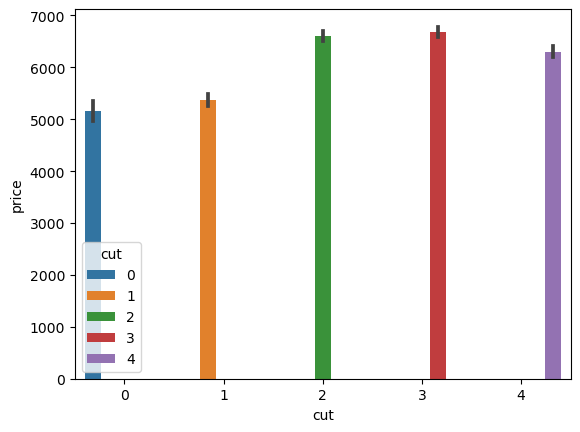

In [8]:
temp = gem_df.groupby(['cut','price']).size().reset_index()
sns.barplot(x = temp['cut'], y = temp['price'], hue = temp['cut'])

<AxesSubplot: xlabel='color', ylabel='price'>

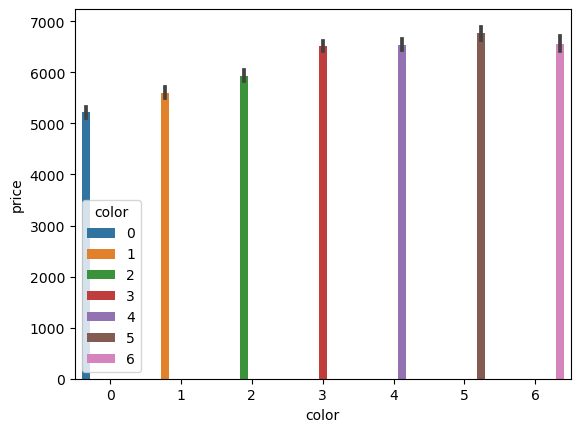

In [9]:
temp2 = gem_df.groupby(['color','price']).size().reset_index()
sns.barplot(x = temp2['color'], y = temp2['price'], hue =temp2['color'])

<AxesSubplot: xlabel='clarity', ylabel='price'>

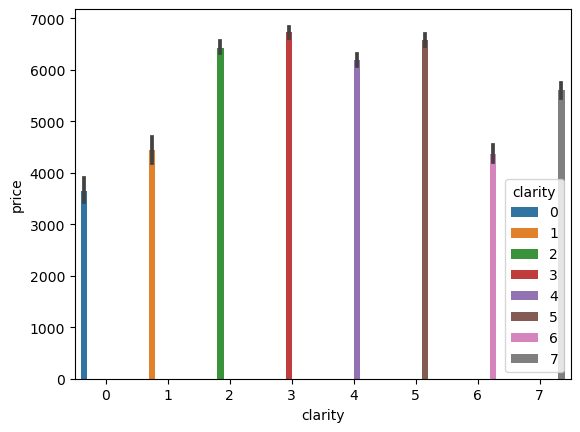

In [10]:
temp3 = gem_df.groupby(['clarity','price']).size().reset_index()
sns.barplot(x = temp3['clarity'], y = temp3['price'], hue =temp3['clarity'])

In [11]:
X = gem_df.copy()
X.drop('price', axis =1, inplace = True)

y = gem_df['price']

In [12]:
X=(X-X.mean())/X.std()

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40)

In [14]:
import xgboost as xgb
dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)
dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True)

In [15]:
evals = [(dtest_reg, "validation"), (dtrain_reg, 'train')]
params = {"objective": "reg:squarederror"}
model = xgb.train(dtrain = dtrain_reg, evals = evals, 
                  num_boost_round = 2000, params=params,
                  early_stopping_rounds=50,
                  verbose_eval=100 )
predictor = xgb.XGBRegressor().fit(X_train, y_train, xgb_model = model)

[0]	validation-rmse:3994.28255	train-rmse:4002.33498
[100]	validation-rmse:593.67354	train-rmse:504.48826
[200]	validation-rmse:600.11369	train-rmse:466.04825
[300]	validation-rmse:604.42455	train-rmse:438.93786
[400]	validation-rmse:610.29307	train-rmse:415.60167
[500]	validation-rmse:613.95492	train-rmse:395.31361
[600]	validation-rmse:617.06564	train-rmse:378.06209
[700]	validation-rmse:620.30154	train-rmse:363.65154
[800]	validation-rmse:623.70056	train-rmse:350.19389
[900]	validation-rmse:626.11413	train-rmse:337.99511
[1000]	validation-rmse:629.22280	train-rmse:326.46667
[1100]	validation-rmse:632.01189	train-rmse:316.91601
[1200]	validation-rmse:633.98064	train-rmse:308.68652
[1300]	validation-rmse:635.68429	train-rmse:300.21509
[1400]	validation-rmse:637.52186	train-rmse:292.08446
[1500]	validation-rmse:639.35579	train-rmse:284.09522
[1600]	validation-rmse:640.72420	train-rmse:277.47797
[1700]	validation-rmse:641.97587	train-rmse:270.61403
[1800]	validation-rmse:643.59032	train

In [16]:
predictor.score(X_train, y_train)

0.9961143386130781

In [17]:
predictor.score(X_test, y_test)

0.9743229698158017

In [18]:
test_file_path = '/Users/rudra_sarkar/Documents/Mtech Second Sem/Research Methodology/Dataset/test.csv'
test_df = pd.read_csv(test_file_path)
test_df.head(4)

,id,carat,cut,color,clarity,depth,table,x,y,z
0,193573,0.35,Ideal,D,VS2,62.3,56.0,4.51,4.54,2.82
1,193574,0.77,Very Good,F,SI2,62.8,56.0,5.83,5.87,3.68
2,193575,0.71,Ideal,I,VS2,61.9,53.0,5.77,5.74,3.55
3,193576,0.33,Ideal,G,VVS2,61.6,55.0,4.44,4.42,2.73


In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
test_df['cut'] = le.fit_transform(test_df['cut'])
test_df['color'] = le.fit_transform(test_df['color'])
test_df['clarity'] = le.fit_transform(test_df['clarity'])
test_df.head(4)

,id,carat,cut,color,clarity,depth,table,x,y,z
0,193573,0.35,2,0,5,62.3,56.0,4.51,4.54,2.82
1,193574,0.77,4,2,3,62.8,56.0,5.83,5.87,3.68
2,193575,0.71,2,5,5,61.9,53.0,5.77,5.74,3.55
3,193576,0.33,2,3,7,61.6,55.0,4.44,4.42,2.73


In [20]:
test_df_copy = test_df.copy()
test_df_copy.drop('id', axis = 1, inplace = True)
test_df_copy.head(4)

,carat,cut,color,clarity,depth,table,x,y,z
0,0.35,2,0,5,62.3,56.0,4.51,4.54,2.82
1,0.77,4,2,3,62.8,56.0,5.83,5.87,3.68
2,0.71,2,5,5,61.9,53.0,5.77,5.74,3.55
3,0.33,2,3,7,61.6,55.0,4.44,4.42,2.73


In [21]:
test_df_copy=(test_df_copy-test_df_copy.mean())/test_df_copy.std()

In [22]:
test_scores = predictor.predict(test_df_copy)

In [23]:
test_scores = pd.DataFrame(test_scores)

In [24]:
new_df = pd.concat([test_df['id'], test_scores], axis = 1)

In [27]:
new_df.columns = ['id', 'price']

In [28]:
new_df.head()

,id,price
0,193573,866.852295
1,193574,2431.106201
2,193575,2122.148926
3,193576,898.552612
4,193577,5513.895996


In [30]:
new_df.to_csv('gem_predictions.csv', index=False)